# Домашнее задание №1
*Задание выполнил* **Чащин Артем Максимович**

*Курс:* **3**, *группа:* **МФТИ-1**

**[GitHub](https://github.com/alexvilno/PSU_TIMESERIES/tree/HW2)**

**[Telegram](https://t.me/artemchashchin)**

## Оглавление
* [Генерация белого шума](#white)
* [Генерация розового шума](#rose)
* [Генерация черного шума](#black)
* [Генерация незашумленного сигнала по функции и его зашумление](#func)



### Генерация белого шума <a id="white"></a>

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

Функция, которая добавляет легенду на график

In [154]:
def plot_with_assignation(axp, data, title1, duration=5, xlabel='Time(s)', ylabel='Amplitude'):
    axp.plot(np.linspace(0, duration, len(data)) ,data)
    axp.set_xlabel(xlabel)
    axp.set_ylabel(ylabel)
    axp.set_title(title1)

Скрафтим белый шум используя *нормальное распределение* с параметрами 0, 1

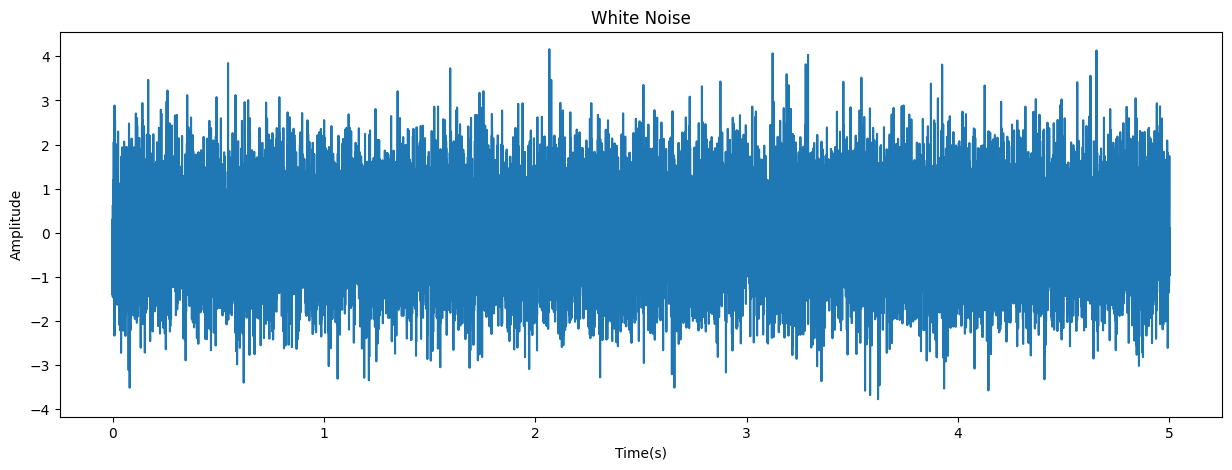

In [155]:
dur = 5
rate = 4100
num_samples = dur * rate

white_noise = np.random.normal(0, 1, num_samples)
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot_with_assignation(axp=axs, duration=5, data=white_noise, title1='White Noise')

Получились звуки двигателей самолета

In [156]:
sd.play(white_noise, rate)
sd.wait()

### Генерация розового шума <a id="rose"></a>

Сгенерим *розовый шум* преобразованием Фурье *(наконец-то оно пригодилось)* к белому

In [157]:
fft = np.fft.rfft(white_noise)
fft_norm = np.real(fft) / np.sqrt(np.arange(1, len(fft) + 1))
rose_noise = np.fft.irfft(fft_norm, len(white_noise))

Теперь визуализируем его

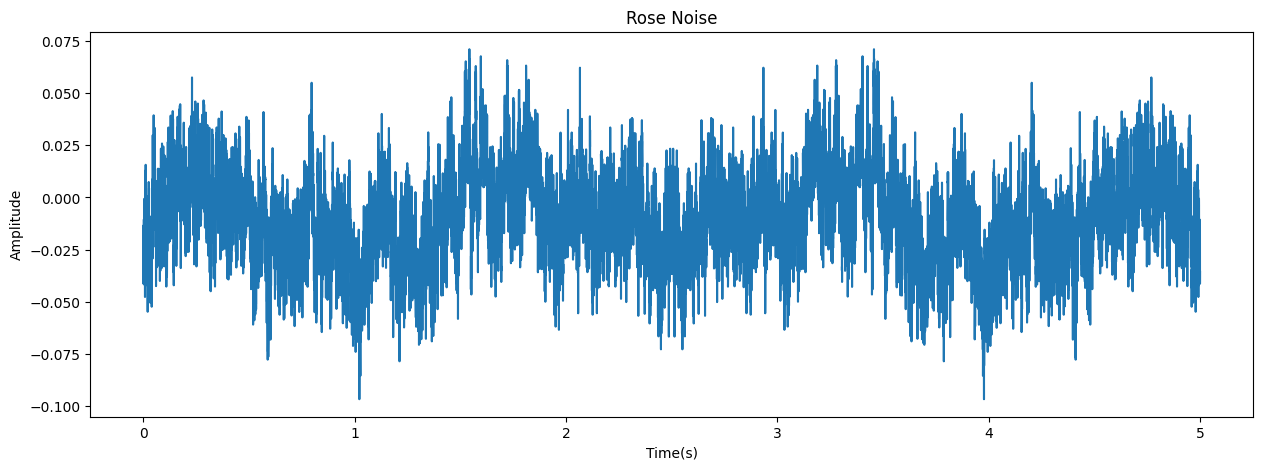

In [158]:
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot_with_assignation(axp=axs, duration=5, data=rose_noise, title1='Rose Noise')

Слушаем его

In [159]:
sd.play(rose_noise, rate)
sd.wait()

Вроде что-то там поменялось, может я глухой

### Генерация черного шума <a id="black"></a>

Сгенерируем черный шум темного тела с температурой 17 нанокельвинов

In [160]:
import scipy

k = scipy.constants.k
c = scipy.constants.c
h = scipy.constants.physical_constants['Planck constant'][0]

T = 17  / np.power(10, 9)
G = 10
c1 = 2 * h / (c ** 2 * T ** 3)
c2 = h / (k * T)

rate2 = 1000
num_samples = dur * rate2

black_noise = np.zeros(num_samples)
equalizer = 10 * np.log(c1 * np.power(rate2, 3) / (np.exp(c2 * rate2) - 1)) + 10
black_noise = white_noise + equalizer
black_noise /= np.max(np.abs(black_noise)) # Нормализация амплитуды к [-1; 1]



Смотрим визуализацию

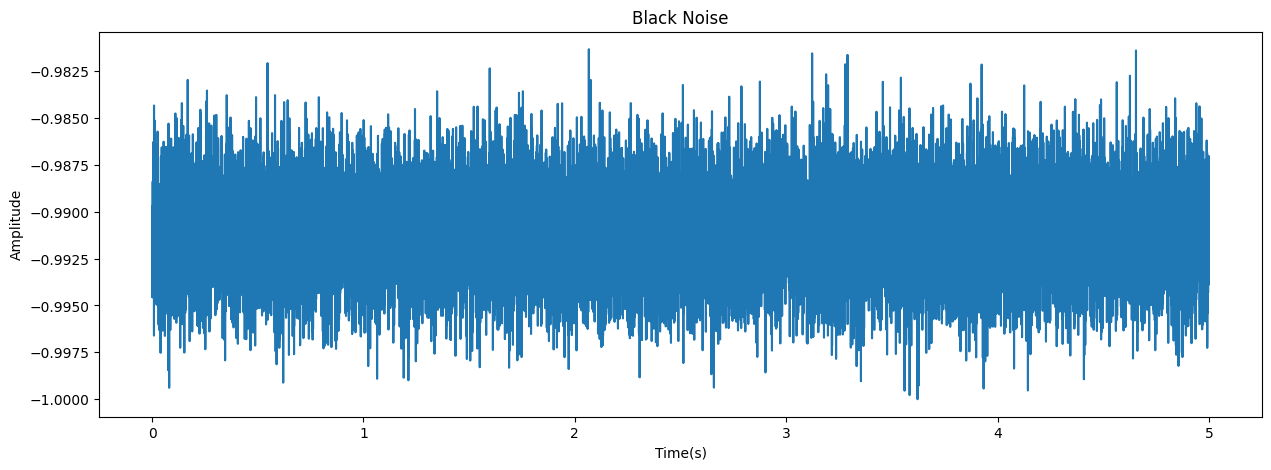

In [161]:
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot_with_assignation(axp=axs, duration=5, data=black_noise, title1='Black Noise')

Слушаем

In [162]:
sd.play(black_noise, rate)
sd.wait()

*Как будто кого-то убили...*

### Генерация незашумленного сигнала по функции и его зашумление <a id="func"></a>

Для получения этих типов моделей нужно добавить **шумовую компоненту**. Мой выбор пал на **белый шум**. Сгенерю его.

In [163]:
duration = 5  # Продолжительность в секундах
rate3 = 4100  # Частота дискретизации в Гц

num_points = duration * rate3  # количество точек

time_points = np.linspace(0, duration, num_points)

white_noise_sub = np.random.normal(0, 0.05, num_points)

values = np.sqrt(np.arctanh(time_points) /  np.exp(time_points))

values_noise = values + white_noise_sub


/var/folders/ns/8k4fm20x1_g6s3_88nzjddf00000gn/T/ipykernel_5934/3012223463.py:10: RuntimeWarning: invalid value encountered in arctanh
  values = np.sqrt(np.arctanh(time_points) /  np.exp(time_points))


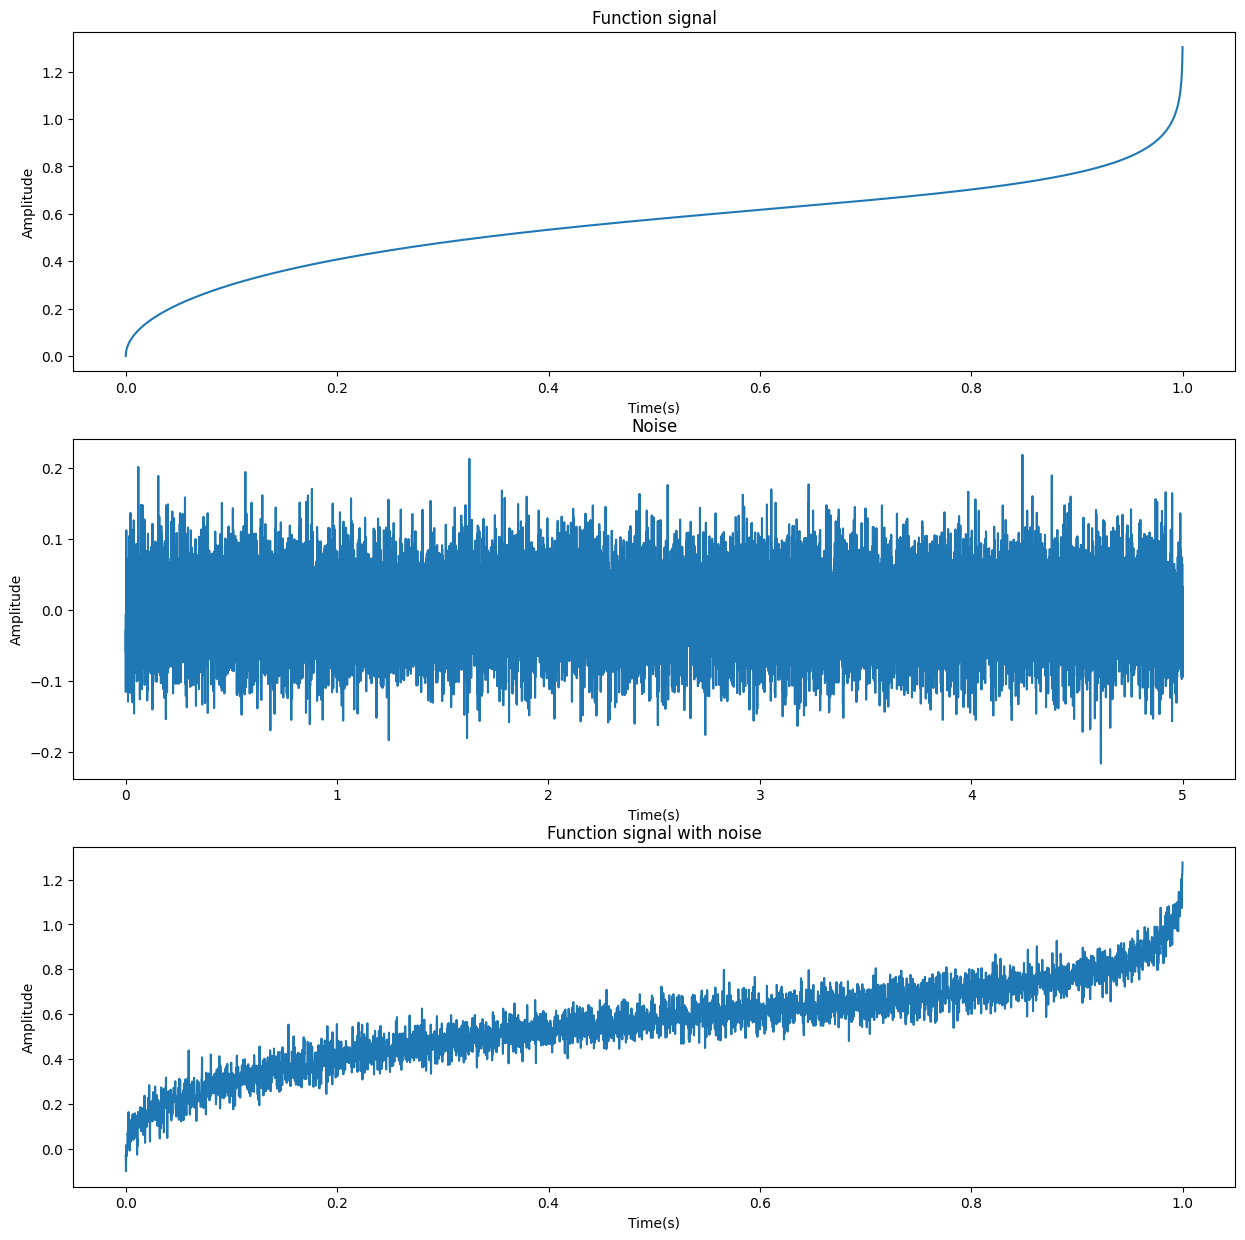

In [164]:
fig, axs = plt.subplots(3,1,figsize=(15,15))
plot_with_assignation(axp=axs[0], duration=duration, data=values, title1='Function signal')
plot_with_assignation(axp=axs[1], duration=duration, data=white_noise_sub, title1='Noise')
plot_with_assignation(axp=axs[2], duration=duration, data=values_noise, title1='Function signal with noise')